<a href="https://colab.research.google.com/github/duongnhan13/Python/blob/main/IBM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Preprocessing

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns ; sns.set()







* **Description**
1. loan_status : Tình trạng khoản vay 
1. Principal : Số tiền vay 
2. terms : Lịch thanh toán khoản vay ( ngày ) 
3. effective_date	: ngày vay 
4. due_date : ngày đến hạn trả 
5. age : tuổi 
6. education : Học vấn 
7. Gender : Giới tính 




In [ ]:
data='https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv'

In [ ]:
df = pd.read_csv(data)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
#Check thông tin data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [ ]:
#Kiểm tra các giá trị Nan 
df.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

* Qua kiểm tra tệp data k có giá trị null , Nan , có 5 column dạng obj 
* 2 column lưu trị thông tin về thời gian 

In [ ]:
#Check 3 cloumn 
print(df['loan_status'].unique())
print(df['education'].unique())
print(df['Gender'].unique())

['PAIDOFF' 'COLLECTION']
['High School or Below' 'Bechalor' 'college' 'Master or Above']
['male' 'female']


In [ ]:
#2 Column Unamed: 0.1 , Unamed: 0 không có ý nghĩa (Drop 2 column)
df = df.drop(['Unnamed: 0','Unnamed: 0.1' ], axis=1)

In [ ]:
# Thay đổi dạng dữ liệu của 2 cột effective_date và due_date về dạng datetime
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

# Data visualization

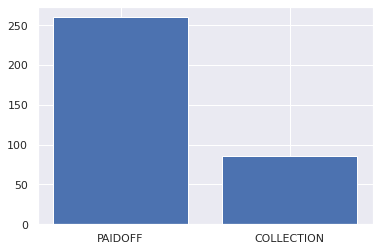

In [ ]:
ls= df['loan_status'].value_counts()
plt.bar(ls.index, ls.values)
plt.show()

In [ ]:
df['loan_status'].value_counts(normalize=True)

PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64

* PAIDOFF 75%

<AxesSubplot:xlabel='Gender'>

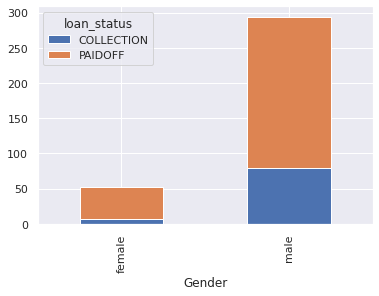

In [ ]:
df[['Gender','loan_status']].groupby(['Gender','loan_status']).size().reset_index().pivot(columns='loan_status', index='Gender', values=0).plot(kind = 'bar', stacked = True)

In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

* Check 86% nữ paidoff và 73% nam paidoff 

<AxesSubplot:xlabel='education'>

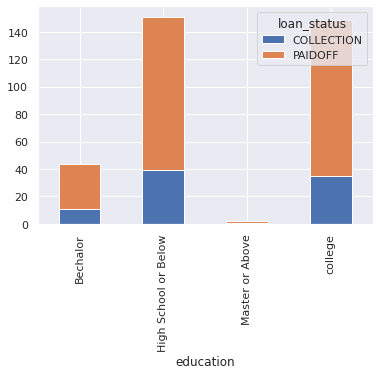

In [ ]:
df[['education','loan_status']].groupby(['education','loan_status']).size().reset_index().pivot(columns='loan_status', index='education', values=0).plot(kind = 'bar', stacked = True)

In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

* Bechalor paidoff 75%
* Master or Above 50%
* college 76%
* High School or Below 74%

dayofweek
0    0.965517
1    1.000000
2    1.000000
3    1.000000
4    0.500000
5    0.548387
6    0.608434
Name: loan_status, dtype: float64


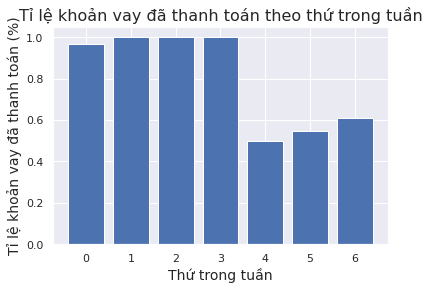

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df['dayofweek'] = df['effective_date'].dt.dayofweek
paid_rates = df.groupby('dayofweek')['loan_status'].apply(lambda x: (x == 'PAIDOFF').mean())
print(paid_rates)

ax.bar(paid_rates.index, paid_rates)
ax.set_title('Tỉ lệ khoản vay đã thanh toán theo thứ trong tuần', fontsize=16)
ax.set_xlabel('Thứ trong tuần', fontsize=14)
ax.set_ylabel('Tỉ lệ khoản vay đã thanh toán (%)', fontsize=14)


plt.show()

* Qua kiểm tra ta thấy tỷ lệ PAIDOFF với các khoản vay trong tuần từ t2-t5 có tỷ lệ thanh toán trên 98%


# Pre processing

In [ ]:
#Phân nhóm từ thứ 2 đến thứ 5 và nhóm cuối tuần 
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [ ]:
#Đổi 2 giá trị column Gender 
#male = 0 , female = 1 
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [ ]:
#Mã hóa dùng thư viện LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #Thư viện mã hóa LabelEncoder
cols = ['Principal','terms'] # # Encode labels of multiple columns at once 
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head(5)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,4,2,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,4,2,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,4,1,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,4,2,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,4,2,2016-09-09,2016-10-08,29,college,0,4,1


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
df_array = np.array(df)
age = df_array[:, 2].astype(float)
# Tiêu chuẩn hóa cột 'age'
scaler = StandardScaler()
df['age'] = scaler.fit_transform([[x] for x in age])
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,4,2,2016-09-08,2016-10-07,0.884344,High School or Below,0,3,0
1,0,4,2,2016-09-08,2016-10-07,0.884344,Bechalor,1,3,0
2,0,4,1,2016-09-08,2016-09-22,-0.854196,college,0,3,0
3,0,4,2,2016-09-09,2016-10-08,0.884344,college,1,4,1
4,0,4,2,2016-09-09,2016-10-08,0.884344,college,0,4,1
...,...,...,...,...,...,...,...,...,...,...
341,1,2,1,2016-09-11,2016-09-25,-0.854196,High School or Below,0,6,1
342,1,4,2,2016-09-11,2016-10-10,0.884344,High School or Below,0,6,1
343,1,2,1,2016-09-12,2016-09-26,-0.854196,college,0,0,0
344,1,4,2,2016-09-12,2016-11-10,0.884344,college,0,0,0


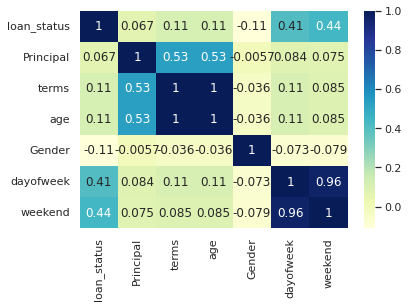

In [ ]:
#Kiểm tra tương quan giữa các biến 
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)# Đổi 2 giá trị loan_status = 0 , 1 
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

* Qua kiểm tra dữ liệu tạo thêm weekend có tương quan lớn nhất với các khoản vay

## Chọn Dữ Liệu

In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,4,2,0.884344,0,0,0,1,0,0
1,4,2,0.884344,1,0,1,0,0,0
2,4,1,-0.854196,0,0,0,0,0,1
3,4,2,0.884344,1,1,0,0,0,1
4,4,2,0.884344,0,1,0,0,0,1


In [ ]:
X = (Feature).values
X

array([[ 4.        ,  2.        ,  0.88434395, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.        ,  2.        ,  0.88434395, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        ,  1.        , -0.85419586, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 2.        ,  1.        , -0.85419586, ...,  0.        ,
         0.        ,  1.        ],
       [ 4.        ,  2.        ,  0.88434395, ...,  0.        ,
         0.        ,  1.        ],
       [ 4.        ,  2.        ,  0.88434395, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
y = df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

* Sau khi lựa chon các biến tiến hành chạy mô hình học máy 

# 2.**Model**


##**Logistic**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [ ]:
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.6161845 , 0.3838155 ],
       [0.63909589, 0.36090411],
       [0.78636122, 0.21363878],
       [0.62156092, 0.37843908],
       [0.84119629, 0.15880371]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[54  0]
 [16  0]]


Confusion matrix, without normalization
[[54  0]
 [16  0]]


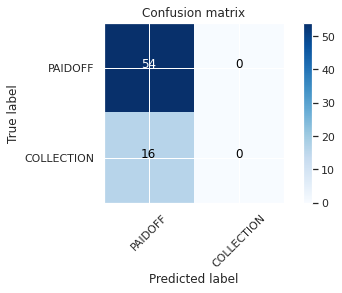

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

True label : 
* paidoff bị dự đoán là collection là 3 
* collection dự đoán là paidoff 12 

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4930438690010561

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        54
           1       0.00      0.00      0.00        16

    accuracy                           0.77        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.60      0.77      0.67        70



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Dữ liệu tập train không dự đoán được value Collection 


In [ ]:
y_pred_lr = LR.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of LR is:", 100 * accuracy_score(y_test, y_pred_lr), '%')


Accuracy of LR is: 77.14285714285715 %


## Naive Baye

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75        54
           1       0.39      0.75      0.51        16

    accuracy                           0.67        70
   macro avg       0.64      0.70      0.63        70
weighted avg       0.78      0.67      0.70        70



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of GNB is:", 100 * accuracy_score(y_test, y_pred_gnb), '%')

Accuracy of GNB is: 67.14285714285714 %


## SVM

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='rbf') 
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        54
           1       0.00      0.00      0.00        16

    accuracy                           0.77        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.60      0.77      0.67        70



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
print("Accuracy of SVM is:", 100 * metrics.accuracy_score(y_test, y_pred_svm), '%')

Accuracy of SVM is: 77.14285714285715 %


## Decsision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 

In [ ]:
loanTree = DecisionTreeClassifier()
loanTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predTree = loanTree.predict(X_test)

In [ ]:
predTree[:5]

array([0, 0, 0, 0, 0])

[Text(0.35185185185185186, 0.95, 'x[4] <= 0.5\ngini = 0.379\nsamples = 276\nvalue = [206, 70]'),
 Text(0.07407407407407407, 0.85, 'x[8] <= 0.5\ngini = 0.018\nsamples = 113\nvalue = [112, 1]'),
 Text(0.037037037037037035, 0.75, 'gini = 0.0\nsamples = 68\nvalue = [68, 0]'),
 Text(0.1111111111111111, 0.75, 'x[1] <= 1.5\ngini = 0.043\nsamples = 45\nvalue = [44, 1]'),
 Text(0.07407407407407407, 0.65, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.14814814814814814, 0.65, 'x[3] <= 0.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.1111111111111111, 0.55, 'x[0] <= 3.0\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.07407407407407407, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14814814814814814, 0.45, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.18518518518518517, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6296296296296297, 0.85, 'x[2] <= -1.723\ngini = 0.488\nsamples = 163\nvalue = [94, 69]'),
 Text(0.5925925925925926, 0.75, 'gi

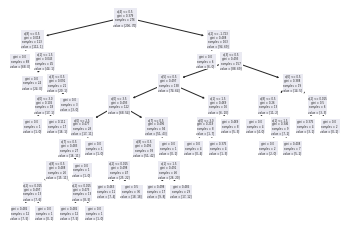

In [ ]:
tree.plot_tree(loanTree)

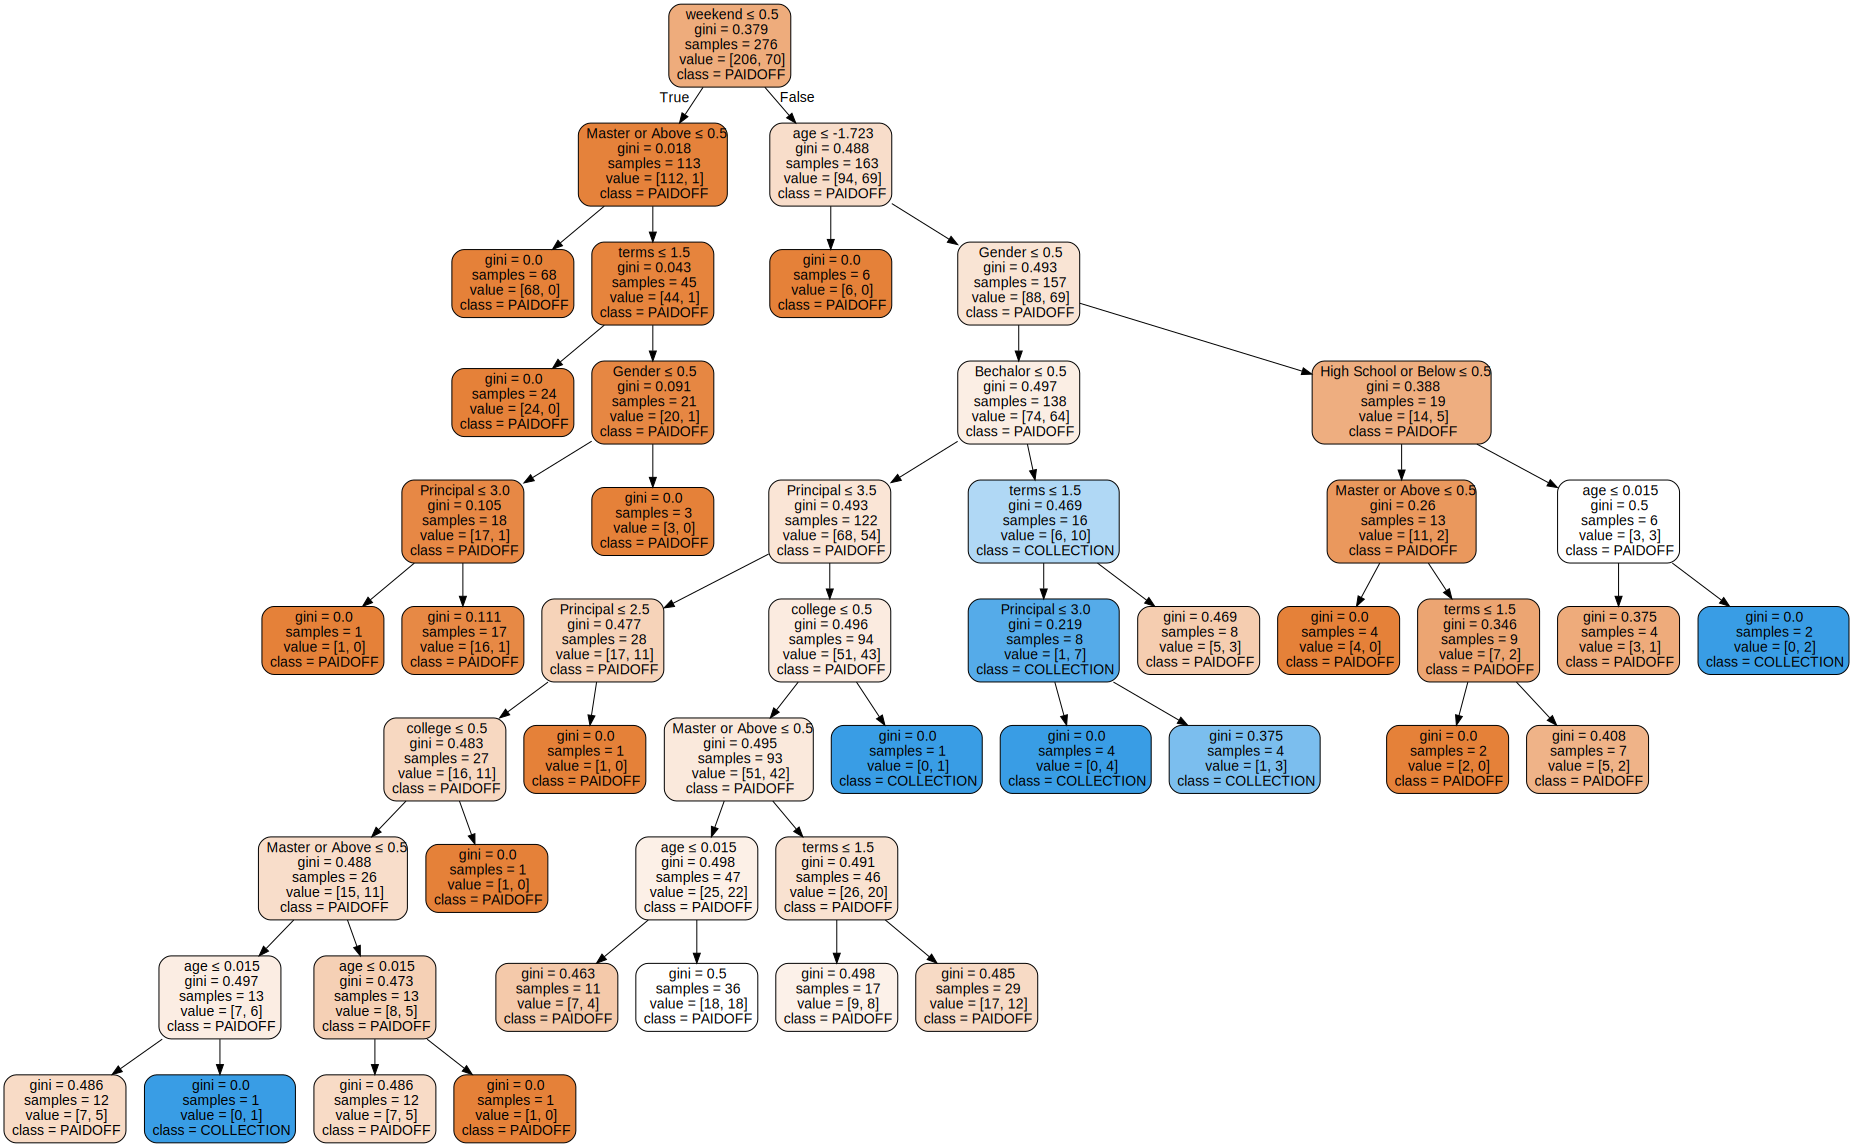

In [ ]:
dot_data = tree.export_graphviz(loanTree, out_file=None,feature_names=['Principal','terms','age','Gender','weekend','Bechalor','High School or Below','college','Master or Above'],
                                class_names=['PAIDOFF','COLLECTION'],filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

Confusion matrix, without normalization
[[50  4]
 [15  1]]


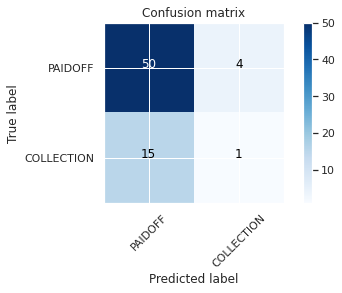

In [ ]:
cnf_matrix = confusion_matrix(y_test, predTree, labels=[0,1])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [ ]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        54
           1       0.20      0.06      0.10        16

    accuracy                           0.73        70
   macro avg       0.48      0.49      0.47        70
weighted avg       0.64      0.73      0.67        70



In [ ]:
from sklearn import metrics
print("Accuracy of decsision tree is:", 100 * accuracy_score(y_test, predTree), '%')

Accuracy of decsision tree is: 72.85714285714285 %


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
loanForest = RandomForestClassifier(n_estimators=100)
loanForest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predForest = loanForest.predict(X_test)

In [ ]:
print(predForest[0:5])
print(y_test[0:5])

[0 0 0 0 0]
[0 0 0 0 0]


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Random Forest's Accuracy: ",100 * metrics.accuracy_score(y_test, predForest), '%')

Random Forest's Accuracy:  72.85714285714285 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predForest))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        54
           1       0.20      0.06      0.10        16

    accuracy                           0.73        70
   macro avg       0.48      0.49      0.47        70
weighted avg       0.64      0.73      0.67        70



In [ ]:
df.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'education', 'Gender', 'dayofweek', 'weekend'],
      dtype='object')

In [ ]:
text_representation = tree.export_text(loanForest.estimators_[0])
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_7 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 3.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_0 >  3.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |--- feature_0 <= 3.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 2.5

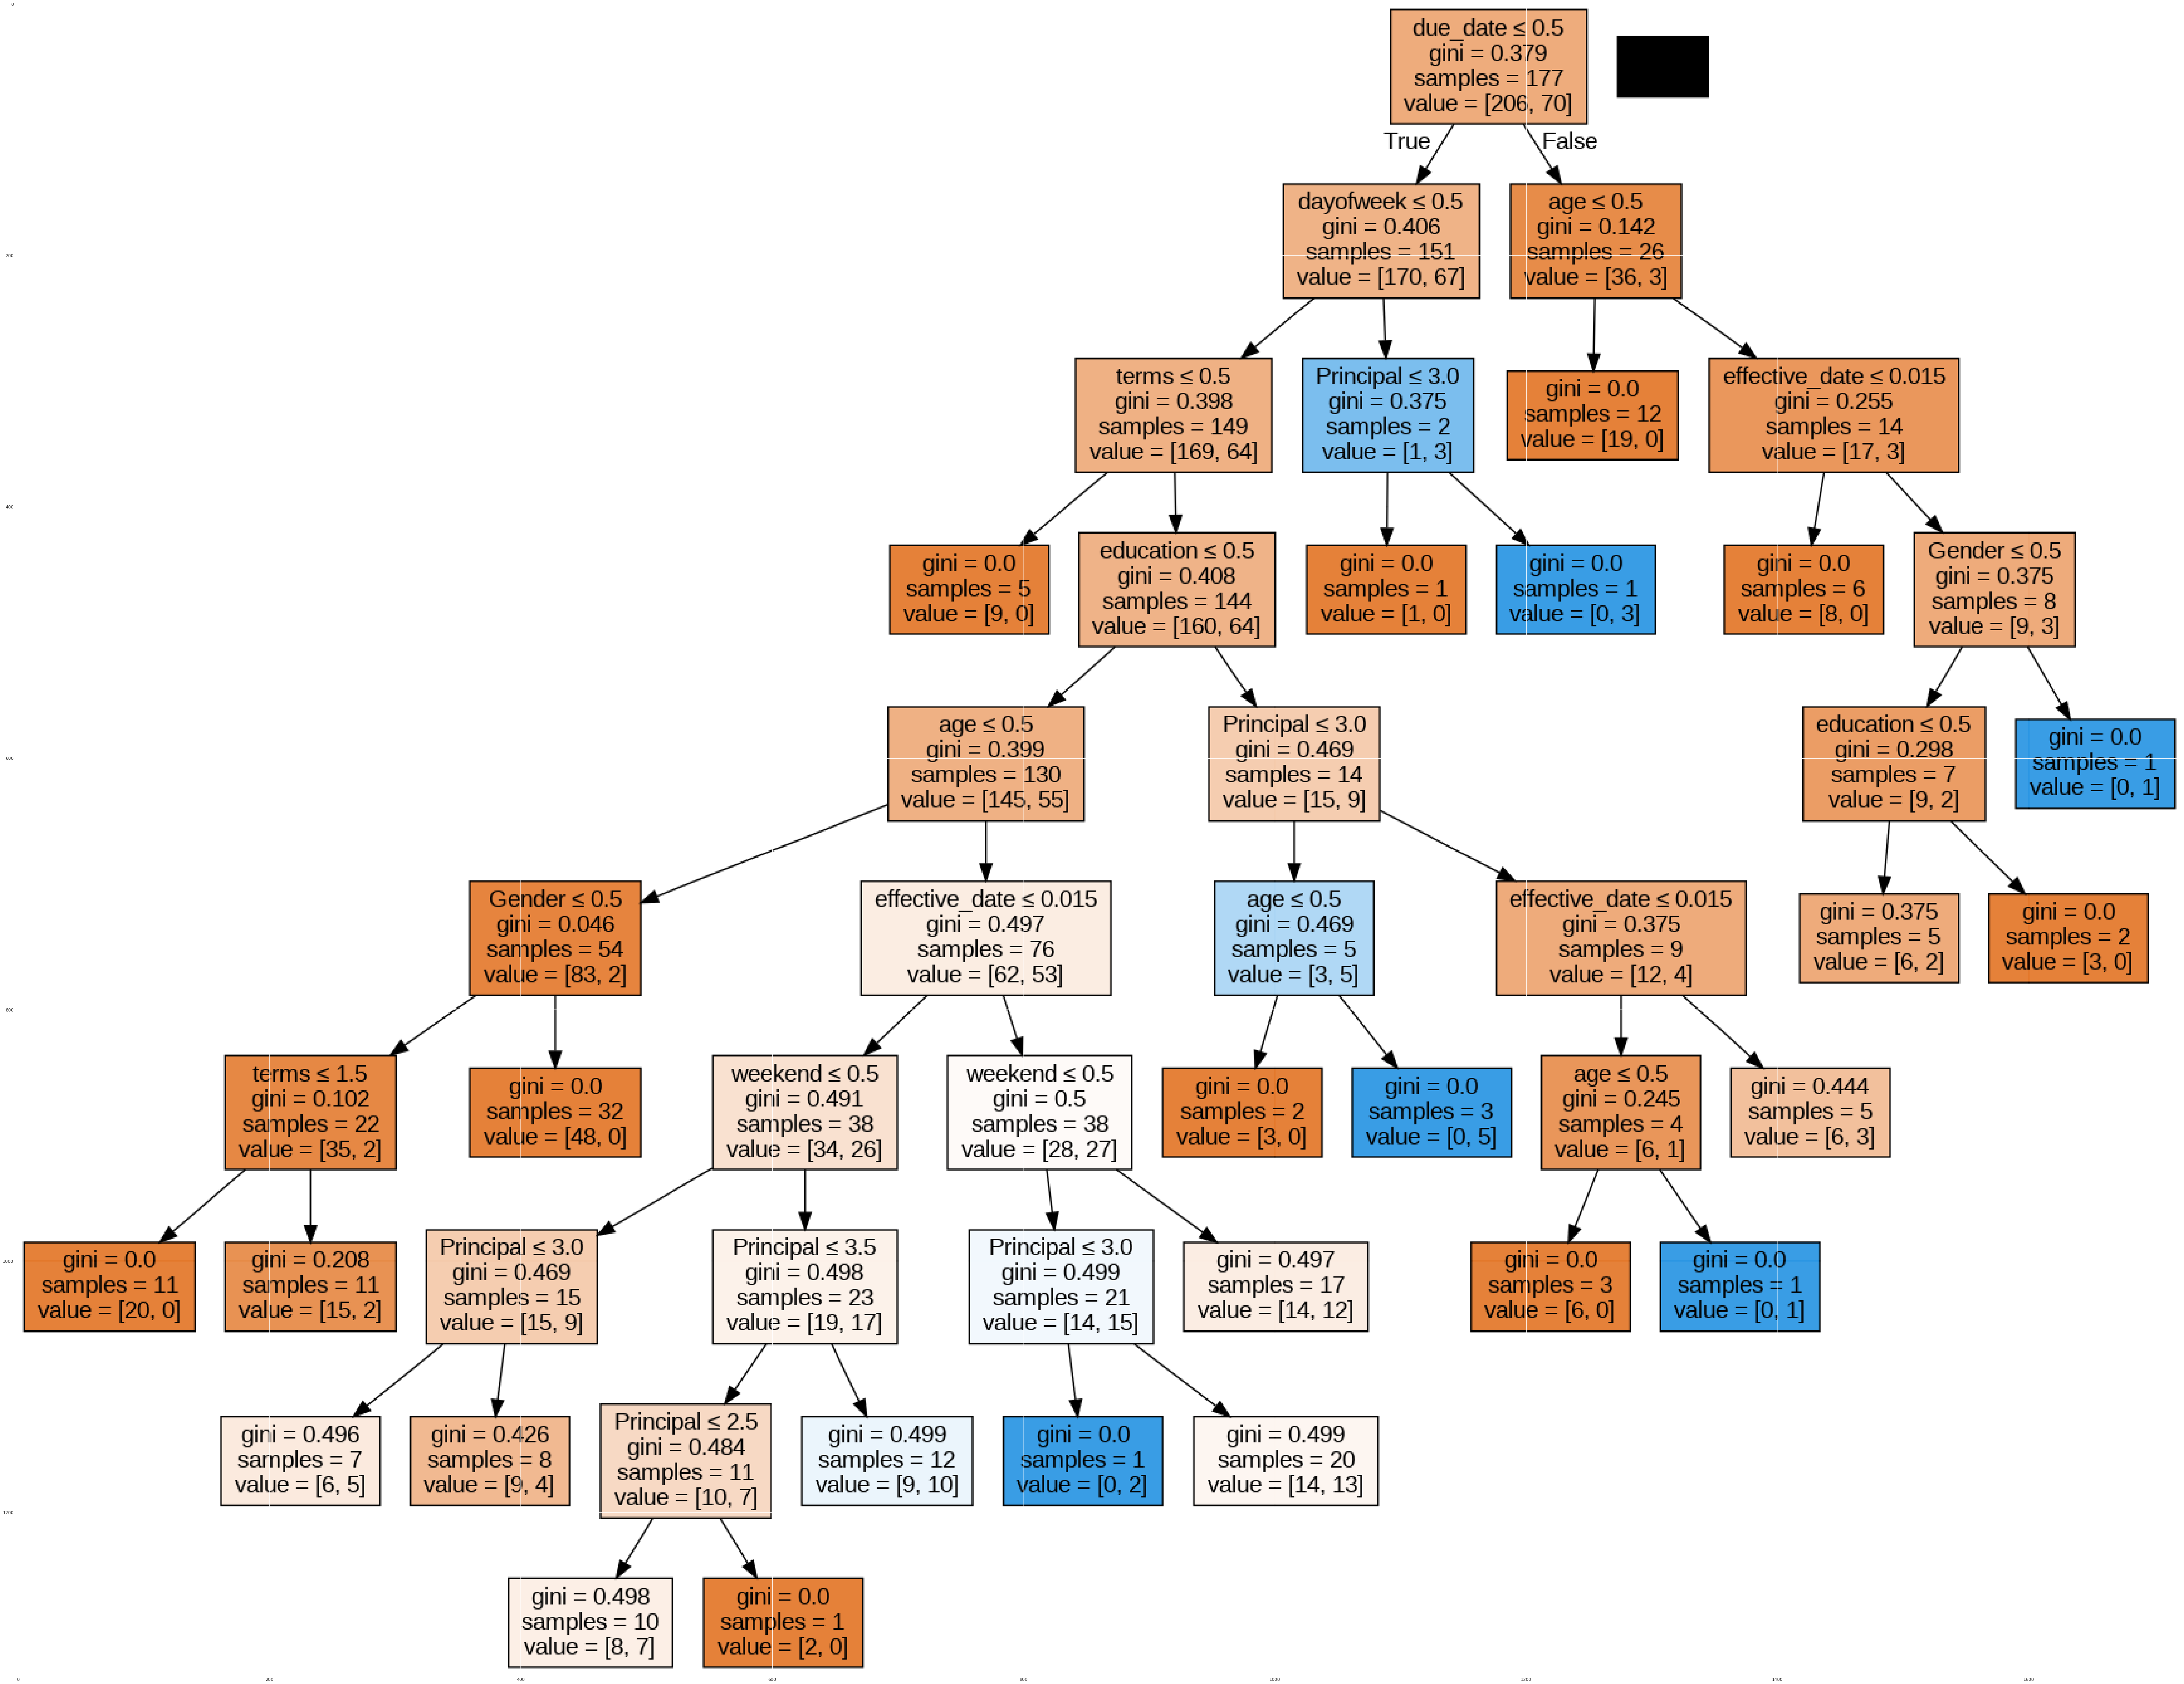

In [ ]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
dot_data = StringIO()
filename = "loanForest_Tree0.png"
featureNames = df.columns[1:10]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loanForest.estimators_[0], feature_names=featureNames, out_file=dot_data, class_names= None, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [ ]:
from sklearn import metrics
print("Random Forest's Accuracy: ",100 * metrics.accuracy_score(y_test, predForest), '%')

Random Forest's Accuracy:  72.85714285714285 %


## KNN

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 50, p = 2, weights = 'distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        54
           1       0.20      0.06      0.10        16

    accuracy                           0.73        70
   macro avg       0.48      0.49      0.47        70
weighted avg       0.64      0.73      0.67        70



In [ ]:
from sklearn import metrics
print("KNN Accuracy: ",100 * metrics.accuracy_score(y_test, y_pred_knn), '%')

KNN Accuracy:  72.85714285714285 %


## Kết luận 

In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test, y_pred_lr), '%')
print("Accuracy of GNB is:", 100 * accuracy_score(y_test, y_pred_gnb), '%')
print("Accuracy of SVM is:", 100 * accuracy_score(y_test, y_pred_svm), '%')
print("Accuracy of Decision Tree is:", 100 * accuracy_score(y_test, predTree), '%')
print("Accuracy of Random Forest is:", 100 * accuracy_score(y_test, predForest), '%')
print("Accuracy of KNN is:", 100 * accuracy_score(y_test, y_pred_knn), '%')

Accuracy of LR is: 77.14285714285715 %
Accuracy of GNB is: 67.14285714285714 %
Accuracy of SVM is: 77.14285714285715 %
Accuracy of Decision Tree is: 72.85714285714285 %
Accuracy of Random Forest is: 72.85714285714285 %
Accuracy of KNN is: 72.85714285714285 %


* 2 thuật toán LR , SVM cho tỷ lệ cao nhất 77%

# 3.XỬ LÝ MẤT CÂN BẰNG DATA

## Sử dụng Smote

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm=SMOTE()
counter = Counter(y)
print('Before SMOTE: ', counter)
X_SM, y_SM = sm.fit_resample(X,y)
counter = Counter(y_SM)
print('After SMOTE: ', counter)

Before SMOTE:  Counter({0: 260, 1: 86})
After SMOTE:  Counter({0: 260, 1: 260})


In [ ]:
#Chia lại X, y
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_SM, y_SM, test_size=0.2, random_state=4)
print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test2.shape,  y_test2.shape)

Train set: (416, 9) (416,)
Test set: (104, 9) (104,)


### Chạy lại với Logistic

In [ ]:
LR = LogisticRegression(C=1.0, solver='liblinear').fit(X_train2,y_train2)
y_pred_lr2 = LR.predict(X_test2)
print(classification_report(y_test2, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65        49
           1       0.68      0.98      0.81        55

    accuracy                           0.75       104
   macro avg       0.82      0.74      0.73       104
weighted avg       0.81      0.75      0.73       104



* Sau khi xử lý data với Smote đã dự đoán đc Colletion


### Chạy lại với SVM 

In [ ]:
svm = svm.SVC(kernel = 'rbf', C = 1.0) 
svm.fit(X_train2, y_train2)
y_pred_svm2 = svm.predict(X_test2)
print(classification_report(y_test2, y_pred_svm2))

              precision    recall  f1-score   support

           0       0.96      0.51      0.67        49
           1       0.69      0.98      0.81        55

    accuracy                           0.76       104
   macro avg       0.83      0.75      0.74       104
weighted avg       0.82      0.76      0.74       104



### Kết luận

In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test2, y_pred_lr2), '%')
print("Accuracy of SVM is:", 100 * accuracy_score(y_test2, y_pred_svm2), '%')

Accuracy of LR is: 75.0 %
Accuracy of SVM is: 75.96153846153845 %


## Sử dụng NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss
NearMiss_Model=NearMiss(version=2)
counter = Counter(y)
print('Before NearMiss: ', counter)
X_NM, y_NM = NearMiss_Model.fit_resample(X,y)
counter = Counter(y_NM)
print('After NearMiss: ', counter)

Before NearMiss:  Counter({0: 260, 1: 86})
After NearMiss:  Counter({0: 86, 1: 86})


In [ ]:
#Chia lại X, y
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_NM, y_NM, test_size=0.2, random_state=4)
print ('Train set:', X_train3.shape,  y_train3.shape)
print ('Test set:', X_test3.shape,  y_test3.shape)

Train set: (137, 9) (137,)
Test set: (35, 9) (35,)


### Chạy lại với Logitic

In [ ]:
LR = LogisticRegression(C=1.0, solver='liblinear').fit(X_train3,y_train3)
y_pred_lr3 = LR.predict(X_test3)
print(classification_report(y_test3, y_pred_lr3))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.81      0.89      0.85        19

    accuracy                           0.83        35
   macro avg       0.83      0.82      0.82        35
weighted avg       0.83      0.83      0.83        35



### Chạy lại với SVM

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel = 'rbf', C = 1.0) 
svm.fit(X_train3, y_train3)
y_pred_svm3 = svm.predict(X_test3)
print(classification_report(y_test3, y_pred_svm3))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.81      0.89      0.85        19

    accuracy                           0.83        35
   macro avg       0.83      0.82      0.82        35
weighted avg       0.83      0.83      0.83        35



### Kết luận


In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test3, y_pred_lr3), '%')
print("Accuracy of SVM is:", 100 * accuracy_score(y_test3, y_pred_svm3), '%')

Accuracy of LR is: 82.85714285714286 %
Accuracy of SVM is: 82.85714285714286 %


## OverSpamling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ROS_Model=RandomOverSampler()
counter = Counter(y)
print('Before ROS: ', counter)
X_ROS, y_ROS = ROS_Model.fit_resample(X,y)
counter = Counter(y_ROS)
print('Before ROS: ', counter)

Before ROS:  Counter({0: 260, 1: 86})
Before ROS:  Counter({0: 260, 1: 260})


In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_ROS, y_ROS, test_size=0.2, random_state=4)
print ('Train set:', X_train4.shape,  y_train4.shape)
print ('Test set:', X_test4.shape,  y_test4.shape)

Train set: (416, 9) (416,)
Test set: (104, 9) (104,)


### Logistic

In [ ]:
LR = LogisticRegression(C=1.0, solver='liblinear').fit(X_train4,y_train4)
y_pred_lr4 = LR.predict(X_test4)
print(classification_report(y_test4, y_pred_lr4))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63        49
           1       0.68      0.95      0.79        55

    accuracy                           0.73       104
   macro avg       0.78      0.72      0.71       104
weighted avg       0.78      0.73      0.71       104



### SVM

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel = 'rbf', C = 1.0) 
svm.fit(X_train4, y_train4)
y_pred_svm4 = svm.predict(X_test4)
print(classification_report(y_test4, y_pred_svm4))

              precision    recall  f1-score   support

           0       0.89      0.51      0.65        49
           1       0.68      0.95      0.79        55

    accuracy                           0.74       104
   macro avg       0.79      0.73      0.72       104
weighted avg       0.78      0.74      0.73       104



### Kết luận


In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test4, y_pred_lr4), '%')
print("Accuracy of SVM is:", 100 * accuracy_score(y_test4, y_pred_svm4), '%')

Accuracy of LR is: 73.07692307692307 %
Accuracy of SVM is: 74.03846153846155 %


## Sau khi chạy lại với các phương pháp xử lý mất cân bằng Data 

 *  Sử dụng NearMiss làm tăng accuracy của các mô hình lên khoảng 5% .
* **NearMiss** tăng accuracy xuống 5%
- Accuracy of LR is: 83 %
- Accuracy of SVM is: 83 %

## 4. Sử dụng GridSearch


In [ ]:
from sklearn.model_selection import GridSearchCV

### SVM

In [ ]:
from sklearn import svm

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [ ]:
grid.best_score_

0.7463636363636365